#### A Python model was developed to make predictions on the Kaggle dataset for the Space Titanic competition (https://www.kaggle.com/competitions/spaceship-titanic), specifically targeting the identification of individuals who escaped from the Space Titanic. The accuracy of the predictions achieved is 80%.

## A1. Introduction 
The Spaceship Titanic, an interstellar liner carrying passengers to new exoplanets, collided with a spacetime anomaly. This event resulted in the disappearance of almost half the passengers, believed to have been transported to an alternate dimension.  In the aftermath of this event, the objective is to develop a robust predictive model to discern which passengers were successfully transported. This analysis is intended to provide valuable insight into the impact of anomalies on different passenger segments by identifying patterns and factors affecting transit success.

## A2. Conclusion
In this analysis, data was cleaned and analyzed to predict the results of passenger transport. Then, features that improve the prediction results were selected, models were implemented, and evaluated, and it was found that Random Forest (Model 3) yielded the highest prediction results. Based on these results, three insights were identified that have a significant impact on passenger transport results. These have the potential to significantly improve model prediction results. Continued refinement of the model, including complex modeling techniques and more advanced feature engineering, has the potential to further improve accuracy.


## A3. Top three actionable insights

### 1 Advanced feature engineering for Numerical data
The lower the expenditure, the higher the percentage that is “Transported.” The number of data is larger than the number of data where no spending exists. It was necessary to take these factors into account and weigh the data. In order to do that, various other methods can be considered to normalize the numerical data such as Robust Scaling and resampling methods since the normalization method changed, the accuracy of the model was improved. By recognizing the impact of expenditure levels on the likelihood of being "Transported" and addressing the imbalance in the dataset through appropriate normalization techniques and model evaluation strategies, it would develop a more reliable and accurate prediction model.

### 2 Advanced feature engineering for Categorical data
Categorical data is only transformed with dummies(0,1) this time. However, based on the EDA, categorical columns also have some trend of Transported, and it is effective to apply the business logic to those with a high probability of being "transported." As well as numerical data should be weighted depending on the transported ratio, and categorical data also should be weighted. One approach to achieve this is through Impact Encoding, where each level of the category is encoded with a numerical value representing its impact on the target variable. For instance, "Cabin_Deck_G" indicates a relatively high number of passengers and a high percentage of being transported. Applying Impact Encoding to such variables during feature engineering would likely contribute to improving the predictive model's accuracy.

### 3 Solid data cleaning (Outlier, NA)
The best model, Random Forest, offers opportunities for improvement in accuracy, including increasing the number of trials and decision trees. Additionally, while the model was constrained in the competition, exploring other models is an option. Selecting the most suitable model will be a priority after performing feature engineering for the mentioned aspects. The models are restricted, but XGBClassifier is known for its high predictive performance and its ability to mitigate overfitting. It is also important to appropriately utilize models that evaluate the importance of each feature and provide high predictive performance. Lastly, enhancing variable selection can be considered. Using statistical methods like t-tests and ANOVA,  along with random forests and gradient boosting, allows for the identification of variables more strongly correlated with each other.


# B. Data Exploration 

### Explanation about the data 
This analysis consists of nearly 13000 data points in total, split into training and test data sets, all aimed at predicting how the passengers of the collided TitanicSpace Ship were selected for transport (Transported).
The data set consisted of 14 columns including transported. These columns provide us an understanding of the nature of the passengers we had on board namely:

**PassengerId** / A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** / The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** / Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** / The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** / The planet the passenger will be debarking to.

**Age** / The age of the passenger.

**VIP** / Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** / Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** / The first and last names of the passenger.

**Transported**  / Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer


from pathlib import Path


# specifying file name
file = Path('data').joinpath('train.csv')
file2 = Path('data').joinpath('test.csv')
file3 = Path('data').joinpath('sample_submission.csv')

# reading the file into Python
train_df = pd.read_csv(file)
copy_train = train_df.copy()
test_df = pd.read_csv(file2)
sample_df = pd.read_csv(file3)

In [2]:
sample_df

PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]

In [3]:
#chk
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
#chk
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [5]:
#chk
sample_df.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

## B1. Data Exploration  - Cleaning for train_df , test_df 
### Cleaning the Data:
The training data comprises 8693 rows and 14 columns, consisting of floats and objects. The test data has 4227 rows and 13 columns. To analyze behavioral trends among individual and group travelers, the team cleaned passenger IDs by extracting group numbers from individual IDs. Similarly, the Cabin column was divided to extract crucial sub-information points, including the passenger's deck, number, and side (Port P or Starboard S). This division aimed to clarify the status of passengers, distinguishing between those who were transported and those who were not.

### Handling missing Value:
There were missing values in the data set, and handling them was critical to analyzing the data. The Mean of each category was assigned to the numerical column missing values while the Mode was assigned to the missing rows in the categorical column.
This data preprocessing gave birth to the insight found during the exploration of both data sets, giving insight and offering an understanding of the business case.


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
#PassengerID
# Split PassengerId to Group ID and Person ID
new_df = train_df['PassengerId'].str.split('_', expand=True)
new_df.columns = ['Group_id', 'Person_id']  # Set columns name
new_df2 = test_df['PassengerId'].str.split('_', expand=True)
new_df2.columns = ['Group_id', 'Person_id']  # Set columns name

# Combine new_df and train_df
train_df = pd.concat([train_df, new_df], axis=1)
test_df = pd.concat([test_df, new_df2], axis=1)

# Drop PassengerId column
train_df.drop(columns=['PassengerId'], inplace=True)

print(train_df)

     HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P    55 Cancri e  41.0   True          0.0   
8689      Earth      True  G/1499/S  PSO J318.5-22  18.0  False          0.0   
8690      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False          0.0   
8691     Europa     False   E/608/S    55 Cancri e  32.0  False          0.0   
8692     Europa     False   E/608/S    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  

In [9]:
#Cabin
# Split Cabin
cabin_df = train_df['Cabin'].str.split('/', expand=True)
cabin_df.columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side']
cabin_df2 = test_df['Cabin'].str.split('/', expand=True)
cabin_df2.columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side']

# Combine new_df and train_df
train_df = pd.concat([train_df, cabin_df], axis=1)
test_df = pd.concat([test_df, cabin_df2], axis=1)

# Drop PassengerId column
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

print(train_df)

     HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
8688     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
8689      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
8690      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
8691     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
8692     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa 

In [10]:
# Age
# Apply mean values into non assigned values
mean_imputer = SimpleImputer(strategy='mean')
train_df['Age'] = mean_imputer.fit_transform(train_df[['Age']]) 
test_df['Age'] = mean_imputer.fit_transform(test_df[['Age']]) 

In [11]:
# '28.82793047'　→ 28
train_df['Age'] = train_df['Age'].round()
test_df['Age'] = test_df['Age'].round()

In [12]:
train_df['Age'].isna().sum()

0

In [13]:
# Categorical columns
# create a list for categorical columns
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Cabin_deck', 'Cabin_number', 'Cabin_side']

# assign the median values into non assigned values
for column in categorical_columns:
    mode_value = train_df[column].mode()[0] 
    train_df[column].fillna(mode_value, inplace=True)
    
train_df.info()

#For test set
# assign the median values into non assigned values
for column in categorical_columns:
    mode_value = test_df[column].mode()[0] 
    test_df[column].fillna(mode_value, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8693 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Group_id      8693 non-null   object 
 13  Person_id     8693 non-null   object 
 14  Cabin_deck    8693 non-null   object 
 15  Cabin_number  8693 non-null   object 
 16  Cabin_side    8693 non-null   object 
dtypes: bool(3), float64(6), object(8)
memory usage: 976.4+ KB


In [14]:
# Change data from object to category data
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Group_id', 'Person_id', 'Cabin_deck', 'Cabin_number', 'Cabin_side']
for col in categorical_columns:
    train_df[col] = train_df[col].astype('category')

for col in categorical_columns:
    test_df[col] = test_df[col].astype('category')

In [15]:
train_df['Spa'] = train_df['Spa'].fillna(0)
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(0)
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(0)
train_df['RoomService'] = train_df['RoomService'].fillna(0)
train_df['VRDeck'] = train_df['VRDeck'].fillna(0)

test_df['Spa'] = test_df['Spa'].fillna(0)
test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(0)
test_df['FoodCourt'] = test_df['FoodCourt'].fillna(0)
test_df['RoomService'] = test_df['RoomService'].fillna(0)
test_df['VRDeck'] = test_df['VRDeck'].fillna(0)

In [16]:
train_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Group_id        0
Person_id       0
Cabin_deck      0
Cabin_number    0
Cabin_side      0
dtype: int64

In [17]:
test_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Group_id        0
Person_id       0
Cabin_deck      0
Cabin_number    0
Cabin_side      0
dtype: int64

In [18]:
# Check the duplicates columns
print(f"duplicate columns: {train_df.duplicated().sum()}")
print(f"duplicate columns: {test_df.duplicated().sum()}")

duplicate columns: 0
duplicate columns: 0


## B2. Data Exploration - Visualisation 

### Distribution of target variable

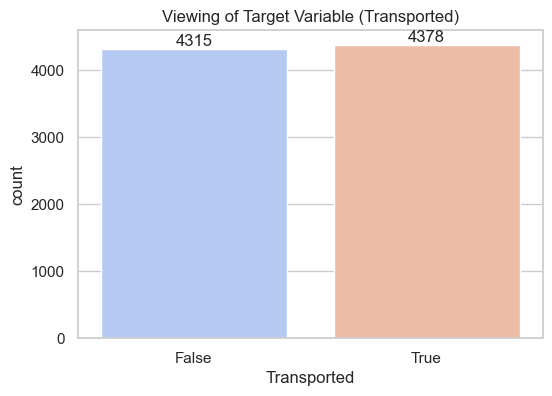

In [19]:
# Setting seaborn style
sns.set(style="whitegrid")

# Viewing of the target variable 'Transported'
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Transported', data=train_df, palette='coolwarm')
plt.title('Viewing of Target Variable (Transported)')

# Iterate over the bars
for p in ax.patches:
    # Use the text function to add count labels
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.show()

#### Visualization 1

This graph shows that transportation situations spread equally across true or false situations. The numbers on both sides are quite close to each other, the number of passengers transported is slightly more than those who are not transported. This graph indicates that a spaceship does not have only one single, more critical variable than other factors and one variable that eliminates the impact of other variables. Instead, multiple factors affect the outcome.

#### Categorical Columns

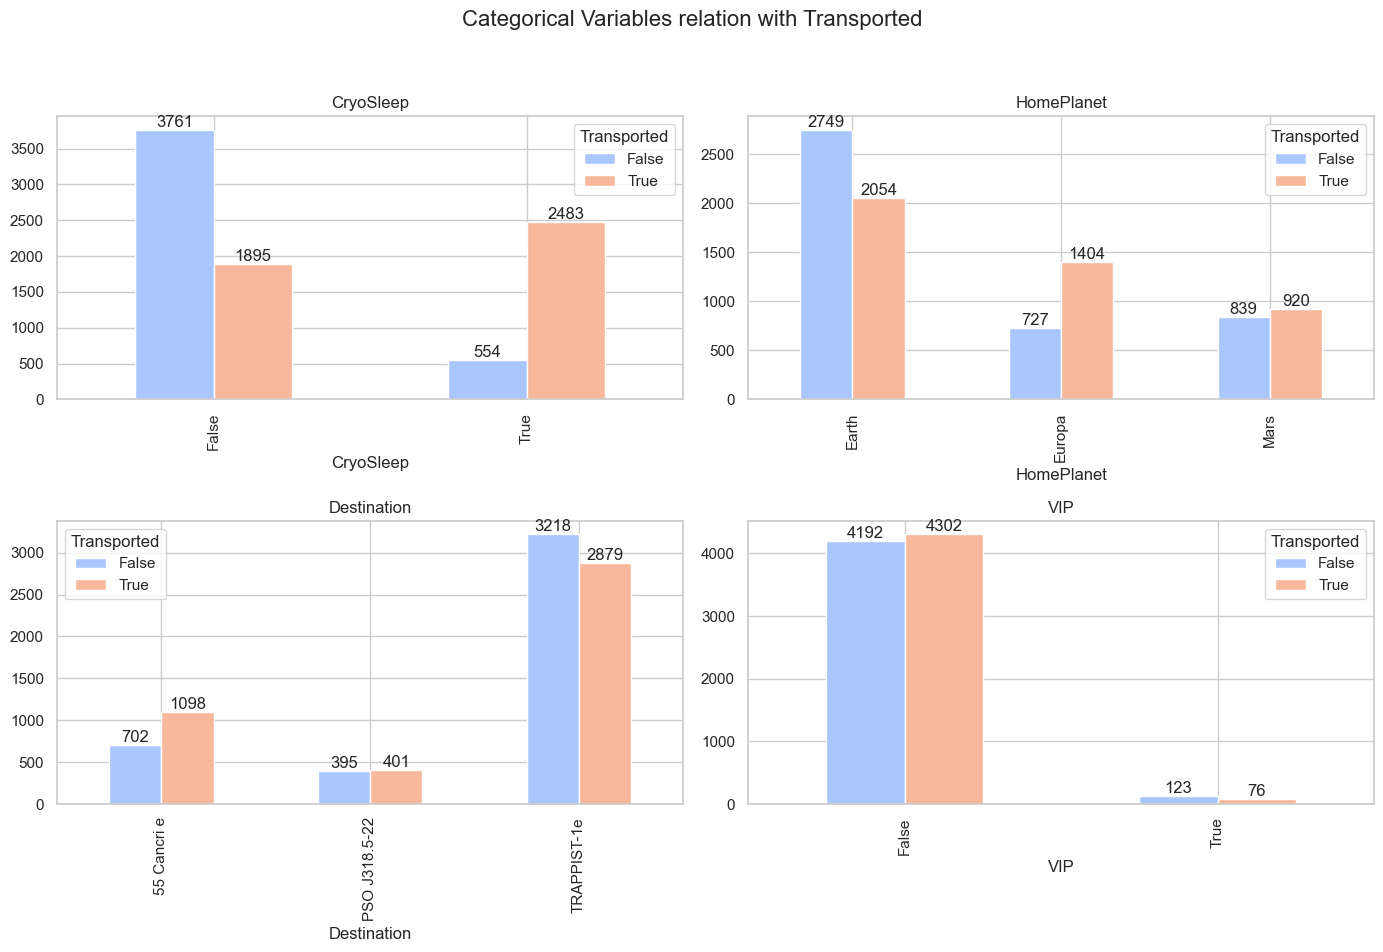

In [20]:
# Visualizing Categorical Variables relation with 'Transported'
categorical_vars = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Categorical Variables relation with Transported', fontsize=16)

# Define the color palette
colors = sns.color_palette("coolwarm", 2)  # 2 colors for True and False

for ax, cat_var in zip(axes.flatten(), categorical_vars):
    category_grouped = train_df.groupby([cat_var, 'Transported']).size().reset_index().pivot(columns='Transported', index=cat_var, values=0)
    category_grouped.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(cat_var)

    # Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Visualization 2
The bar charts showcase correlations between transportation and four categorical variables: Cryosleep status, home planet, passenger destination, and VIP status. Interestingly, passenger destinations exhibit no direct link to transportation, while Cryosleep stands out as a significant factor.

In the Cryosleep chart, less than three-fifths of non-Cryosleep passengers are transported, contrasting with the majority of those in Cryosleep being transported. This highlights Cryosleep's pivotal role in transportation.

Examining home planets reveals nuanced patterns. Europa and Mars passengers are mostly transported, while Earth passengers are notably untransported, suggesting diverse characteristics among planets.

However, the VIP status chart lacks substantial insights due to a limited count,  emphasizing the challenge of drawing conclusive insights from the limited VIP count.


#### Numerical Columns

In [21]:
# Define numerical variables
numerical_vars = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Define bins and bin labels
bins = [0, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000, 21000]
bin_labels = ['0k', '1k', '3k', '5k', '7k', '9k', '11k', '13k', '15k', '17k', '19k']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Iterate through numerical variables
for i, var in enumerate(numerical_vars):
    row = i // 2  # Determine row index
    col = i % 2   # Determine column index
    
    # Group and sum expenditures by bins and Transported status
    grouped_data = train_df.groupby(['Transported', pd.cut(train_df[var], bins=bins, labels=bin_labels)]) \
                           .agg({var: 'sum'}) \
                           .unstack(level=0) \
                           .fillna(0)

    # Fix data structure
    grouped_data.columns = grouped_data.columns.droplevel(0)  # Fix MultiIndex column headers
    grouped_data.columns.name = None  # Remove column names

    # Create stacked bar plot
    grouped_data.plot(kind='bar', stacked=True, ax=axes[row, col])

    # Set title and labels for each subplot
    axes[row, col].set_title(f'Sum of {var} Expenditure by Transported Status')
    axes[row, col].set_xlabel(f'{var} Expenditure (in thousands)')
    axes[row, col].set_ylabel('Sum of Expenditure')
    axes[row, col].legend(title='Transported', labels=['Not Transported', 'Transported'])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Visualization 3
The analysis of passenger spending on the Spaceship Titanic's various entertainment options suggests subtle patterns in predicting transportation status. While Room Service, Spa, and VR Deck display a relatively weak association with transportation, despite their high expenses, there is variability in the transportation outcomes for passengers with both high and low spending in these areas.

On the other hand, the total expenditures in the Food Court and Shopping Mall areas show a more noticeable connection with passenger transportation. Specifically, the Food Court demonstrates a noteworthy correlation, consistently indicating an increasing transportation ratio. These observations shed light on the diverse impact of spending patterns on predicting passenger transportation.

#### Cabin

Passenger cabin names, G/37/P, include three different cabin features which are cabin deck, cabin number, and cabin side, respectively.

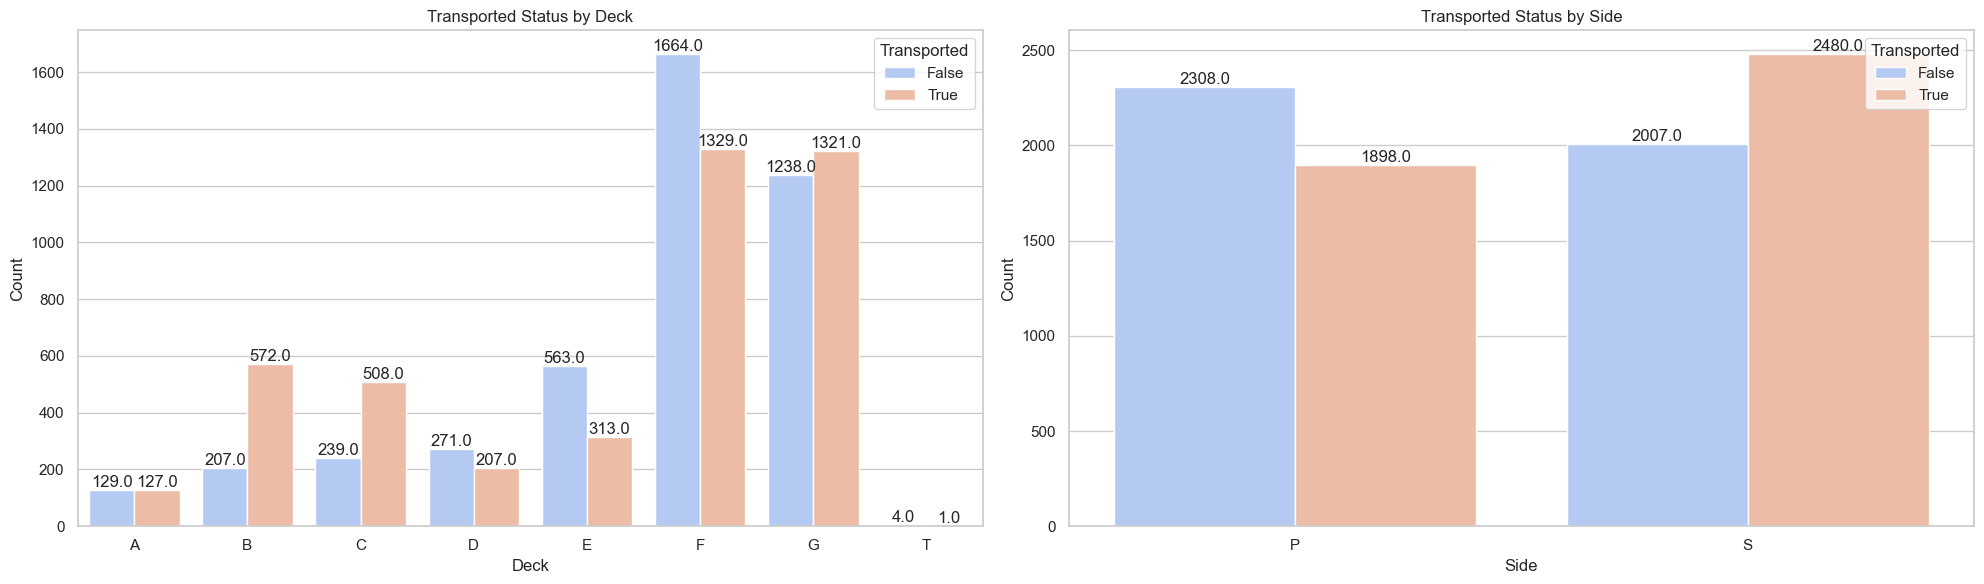

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plotting 'Transported Status by Deck'
sns.countplot(x='Cabin_deck', hue='Transported', data=train_df, palette='coolwarm', ax=axes[0])

# Add data labels
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

axes[0].set_title('Transported Status by Deck')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Deck')
axes[0].legend(title='Transported', loc='upper right')

# Plotting 'Transported Status by Side'
sns.countplot(x='Cabin_side', hue='Transported', data=train_df, palette='coolwarm', ax=axes[1])

# Add data labels
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

axes[1].set_title('Transported Status by Side')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Side')
axes[1].legend(title='Transported', loc='upper right')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Visualization 4
There are eight different cabin decks in the spaceship, such as A, B, and C. Most of the passengers took place from F and G decks. Despite this, their ratio for being transported is not high, and the F cabin deck with the highest passenger number has a ratio of less than one for True transportation status. On the other, the above graph indicates that decks B and C have a stronger relationship with transportation since the majority of the passengers on these decks are transported.

The spaceship has two cabin sides, which are P and S. The S cabin has a more substantial impact than the P cabin according to the above graph transported status of passengers by passenger count, and the P cabin has a weaker impact on the True status of transportation which indicates that there is a correlation between cabin sides and transported status, but the correlation is not strong due to low difference between true and false transported status in both sides.

#### Box plot for outliers

In [23]:
numerical_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(15, 10))

# Ensure each subplot has a valid data input
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Transported', y=feature, data=train_df, palette="coolwarm")
    plt.title(f'Boxplot of {feature} by Transported')

plt.tight_layout()
plt.show()

#### Visualization 5
Besides expenditure patterns, outliers have a strong impact on transported status in the Food Court and Shopping Mall areas. Most of the passengers with spending far higher than average are transported in these areas, but the distribution box plots above show that even the highest and most outlier spending does not impact transportation in the other three areas: Room Service, Spa, and VR Deck. Additionally, the vice versa outliers in the Shopping Mall area for non-Transported passengers show that higher spending in this area is not a single strong indicator of transportation.


#### Age 

In [24]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust if you expect ages beyond 10
# Create histogram
plt.figure(figsize=(15, 5))  # Adjust the size to your preference
n, bins, patches = plt.hist(train_df['Age'], bins=age_bins, edgecolor='black')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age groups')
plt.ylabel('Count of Age')

# Add x-ticks at the bin edges
plt.xticks(age_bins)

for i in range(len(n)):
    plt.text(bins[i]+5, n[i], str(int(n[i])), ha='center', va='bottom')

# Show the plot
plt.show()

#### Visualization 6
The distribution graph of the age of passengers shows that the spaceship involves a wide range of passengers from different age groups, such as 0-year-old babies and more than 70 years old elderly people, but the majority of passengers are people between the ages of 20-30, which is adult people followed by teens.

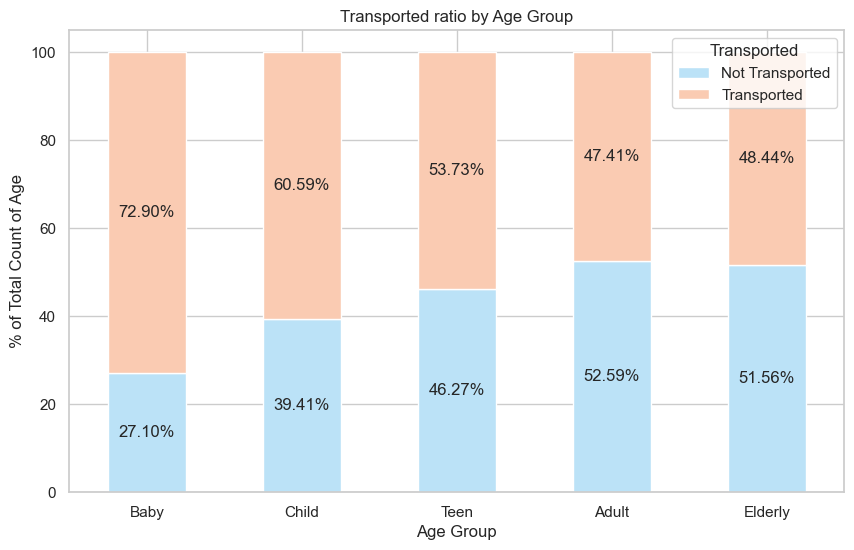

In [25]:
# Create Age Group
age_bins = [0, 5, 12, 18, 50, 150]
age_labels = ['Baby', 'Child', 'Teen', 'Adult', 'Elderly']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

# Calculate the percentage of transported by age group
age_group_percent = train_df.groupby('AgeGroup')['Transported'].value_counts(normalize=True).unstack().mul(100)

# Plot stacked bar chart
ax = age_group_percent.plot(kind='bar', stacked=True, figsize=(10,6), color = ['#bbe2f7', '#facbb2'])

# Add percentage text on each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center')

# Set plot title and labels
plt.title('Transported ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('% of Total Count of Age')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])

# Show plot
plt.show()

#### Visualization 7
Additionally, the ratio of being transported varies between age groups. Passengers in the baby group have a high transportation rate but a very low population. This graph shows that while the age group population does not have a noticeable effect on whether to be transported or not, the passenger's age group has a strong impact. Likewise, the fact that children and teens follow the babies group with the highest ratio indicates this situation.

# C. Feature Engineering  

## C1. Normalization for train_df / test_df

### Normalization 
As a feature engineering step for numerical columns, 'Age' column have 0~79 range of data, however 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' columns have much wider scale of data range. With standardization, the feature scales are aligned and each feature is weighted on the same scale. Specifically, StandardScaler is applied to standardize the scale of columns, and those columns are transformed a particular sequence of numbers so that the mean is 0 and the stadard deviation is 1.

For categorical columns('HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side'), dummy variables are assigned. By using dummy variables, each data of categorical data is identified as numerical and it is appliable to prediction model.

Proper scaling of features enhances model performance, enabling more reliable predictions. Therefore, standardization is an indispensable step in machine learning projects, holding significant actionable value in its implementation.

In [26]:
from sklearn.preprocessing import StandardScaler

# Define the columns to rescale
columns_to_rescale = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns in the training data
train_df[columns_to_rescale] = scaler.fit_transform(train_df[columns_to_rescale])

# Transform the selected columns in the test data using the fitted scaler from the training data
test_df[columns_to_rescale] = scaler.transform(test_df[columns_to_rescale])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8693 non-null   category
 1   CryoSleep     8693 non-null   category
 2   Destination   8693 non-null   category
 3   Age           8693 non-null   float64 
 4   VIP           8693 non-null   category
 5   RoomService   8693 non-null   float64 
 6   FoodCourt     8693 non-null   float64 
 7   ShoppingMall  8693 non-null   float64 
 8   Spa           8693 non-null   float64 
 9   VRDeck        8693 non-null   float64 
 10  Name          8693 non-null   category
 11  Transported   8693 non-null   bool    
 12  Group_id      8693 non-null   category
 13  Person_id     8693 non-null   category
 14  Cabin_deck    8693 non-null   category
 15  Cabin_number  8693 non-null   category
 16  Cabin_side    8693 non-null   category
 17  AgeGroup      8515 non-null   category
dtypes: bool(

### Normalization - Other Categorical Values

In [27]:
train_df = pd.get_dummies(train_df,
                          columns=['HomePlanet',
                                   'CryoSleep',
                                   'Destination',
                                   'VIP','Cabin_deck','Cabin_side'],
                          dtype=float)

In [28]:
train_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group_id', 'Person_id', 'Cabin_number',
       'AgeGroup', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [29]:
test_df = pd.get_dummies(test_df,
                          columns=['HomePlanet',
                                   'CryoSleep',
                                   'Destination',
                                   'VIP','Cabin_deck','Cabin_side'],
                          dtype=float)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        8693 non-null   float64 
 1   RoomService                8693 non-null   float64 
 2   FoodCourt                  8693 non-null   float64 
 3   ShoppingMall               8693 non-null   float64 
 4   Spa                        8693 non-null   float64 
 5   VRDeck                     8693 non-null   float64 
 6   Name                       8693 non-null   category
 7   Transported                8693 non-null   bool    
 8   Group_id                   8693 non-null   category
 9   Person_id                  8693 non-null   category
 10  Cabin_number               8693 non-null   category
 11  AgeGroup                   8515 non-null   category
 12  HomePlanet_Earth           8693 non-null   float64 
 13  HomePlanet_Europa          8693 n

In [31]:
# Change data types
train_df['Group_id'] = train_df['Group_id'].astype(float)
train_df['Person_id'] = train_df['Person_id'].astype(float)
train_df['Cabin_number'] = train_df['Cabin_number'].astype(float)
test_df['Cabin_number'] = test_df['Cabin_number'].astype(float)
test_df['Group_id'] = test_df['Group_id'].astype(float)
test_df['Person_id'] = test_df['Person_id'].astype(float)
train_df['Transported'] = train_df['Transported'].astype(int)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        8693 non-null   float64 
 1   RoomService                8693 non-null   float64 
 2   FoodCourt                  8693 non-null   float64 
 3   ShoppingMall               8693 non-null   float64 
 4   Spa                        8693 non-null   float64 
 5   VRDeck                     8693 non-null   float64 
 6   Name                       8693 non-null   category
 7   Transported                8693 non-null   int64   
 8   Group_id                   8693 non-null   float64 
 9   Person_id                  8693 non-null   float64 
 10  Cabin_number               8693 non-null   float64 
 11  AgeGroup                   8515 non-null   category
 12  HomePlanet_Earth           8693 non-null   float64 
 13  HomePlanet_Europa          8693 n

In [33]:
train_df.drop('AgeGroup', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)

In [34]:
test_df.drop('Name', axis=1, inplace=True)

# D. Creating Models

## Model 1 : Logistic Regression

### What is Logistic Regression?

Logistic Regression is one of the statistical method to estimate the independent variables(another feature like expenditure, cabin, VIP and etc.) and dependent variables("Transpoted").　Logistic regression shows the relationship between predictor variables(indepent variables) and target variables(dependent variables), but logistic regression is generally used when there are two alternatives such as "success" or "failure". For example, whether or not to buy a product, whether or not to get sick, or whether or not to pass an exam. Since it is difficult to express these two options numerically, logistic regression is suitable for such situations as a first model to see the relationship between variables.

##### Citation：
IBM. (n.d.). Logistic Regression. IBM.com. https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,given%20dataset%20of%20independent%20variables.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [36]:
# Define a list of columns to loop through
columns_to_loop = [
    'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
    'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
    'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
    'VIP_False', 'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B',
    'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
    'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'
]

# Calculate Phi correlation coefficient for each column
phi_coefficients = []
for column in columns_to_loop:
    # Create contingency table between column and 'Transported'
    contingency_table = pd.crosstab(train_df[column], train_df['Transported'])
    
    # Chi-square test and Phi correlation for contingency_table
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    phi_coefficient = np.sqrt(chi2 / contingency_table.values.sum())
    
    phi_coefficients.append(phi_coefficient)
    
    # Display coefficients
    print(f"Phi Correlation Coefficient between {column} and 'Transported': {phi_coefficient}")

Phi Correlation Coefficient between HomePlanet_Earth and 'Transported': 0.16861400807013133
Phi Correlation Coefficient between HomePlanet_Europa and 'Transported': 0.17664906258606977
Phi Correlation Coefficient between HomePlanet_Mars and 'Transported': 0.019257184197147434
Phi Correlation Coefficient between CryoSleep_False and 'Transported': 0.4598910706402278
Phi Correlation Coefficient between CryoSleep_True and 'Transported': 0.4598910706402278
Phi Correlation Coefficient between Destination_55 Cancri e and 'Transported': 0.10843843403179447
Phi Correlation Coefficient between Destination_PSO J318.5-22 and 'Transported': 0.0
Phi Correlation Coefficient between Destination_TRAPPIST-1e and 'Transported': 0.0960673946359541
Phi Correlation Coefficient between VIP_False and 'Transported': 0.03649165092858876
Phi Correlation Coefficient between VIP_True and 'Transported': 0.036491650928588755
Phi Correlation Coefficient between Cabin_deck_A and 'Transported': 0.0019428845424814133
Ph

In [37]:
# Create a dictionary to store the exponential values for each column
column_exp = {}

# Calculate EXP value for each Phi correlation coefficient
for column, phi_coefficient in zip(columns_to_loop, phi_coefficients):
    # Calculate exponential of Phi correlation coefficient and subtract 1
    exp_value = np.exp(phi_coefficient) - 1
    
    # Store the result in the dictionary
    column_exp[column] = exp_value

# Print the results
for column, exp_value in column_exp.items():
    print(f"EXP value for {column}: {exp_value}")

EXP value for HomePlanet_Earth: 0.18366316630589474
EXP value for HomePlanet_Europa: 0.19321227681158581
EXP value for HomePlanet_Mars: 0.019443799740573198
EXP value for CryoSleep_False: 0.5839014422271216
EXP value for CryoSleep_True: 0.5839014422271216
EXP value for Destination_55 Cancri e: 0.11453628892031875
EXP value for Destination_PSO J318.5-22: 0.0
EXP value for Destination_TRAPPIST-1e: 0.10083325175027036
EXP value for VIP_False: 0.03716564461156868
EXP value for VIP_True: 0.03716564461156868
EXP value for Cabin_deck_A: 0.0019447731655815037
EXP value for Cabin_deck_B: 0.1552655945965753
EXP value for Cabin_deck_C: 0.11380565735554393
EXP value for Cabin_deck_D: 0.03411025904073317
EXP value for Cabin_deck_E: 0.10250258321773442
EXP value for Cabin_deck_F: 0.08993481180169494
EXP value for Cabin_deck_G: 0.016145392544936632
EXP value for Cabin_deck_T: 0.009817883526346938
EXP value for Cabin_side_P: 0.10646159268476318
EXP value for Cabin_side_S: 0.10646159268476318


### Interpretation Phi Correlation/EXP
Phi correlation coefficient has the range from -1 to 1, and the more coefficient is close to 1, it indicates the more the variable has positive relationship with "Transpoted". For example, "Cabin_side_S" has 0.10116716927369994 coefficient. This means that "Cabin_side_S" has slight positive relationship with target variables but, the relation is really low, and you can assume it wont't bring a positive influence to our prediction. 

Moreover, exponetial value(EXP) tells us what's the odd of business sucess. In this case, what's the odd of "Transpoted". For example, "Cabin_side_S" has 0.10646159268476318 of EXP. It means if cabin side is S, the odds of be traspoted is 10.65%. In other words, when "Cabin_side_S" has little influence on whether the passenger is transported.

Phi coefficients and EXPs allow to focus on variables with stronger correlations, ultimately enhancing the accuracy and effectiveness of predictive models, and informing strategic decision-making in various industries, such as transportation, hospitality, and logistics.

In [38]:
# Define the features (X) and target (y)
X = train_df[[
    'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
    'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
    'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
    'VIP_False', 'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B',
    'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
    'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'
]]
y = train_df['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.721679125934445
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       861
           1       0.77      0.64      0.70       878

    accuracy                           0.72      1739
   macro avg       0.73      0.72      0.72      1739
weighted avg       0.73      0.72      0.72      1739



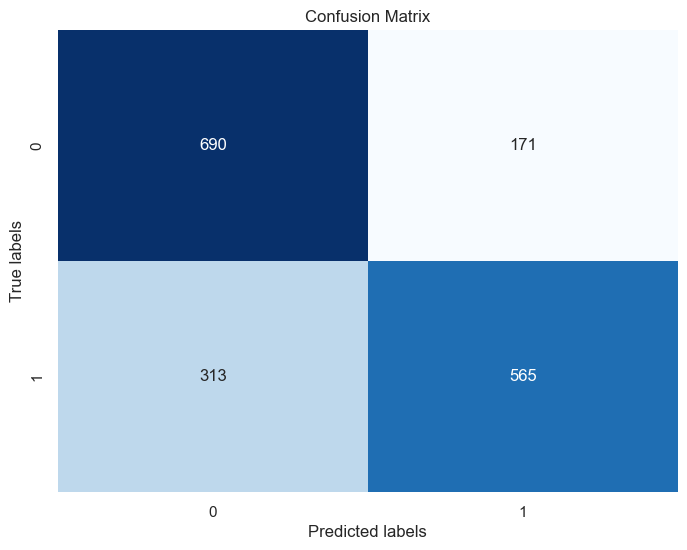

In [39]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
X_train.columns

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [41]:
# Select the exact same columns of X_train
selected_features = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

# Predict on test_df
x_test = test_df[selected_features]

y_pred_test = model.predict(x_test)

print(y_pred_test)

[1 0 1 ... 1 0 1]


In [42]:
# Assuming test_df is your DataFrame and y_pred_test is your predictions
data = {
    'PassengerId': test_df["PassengerId"],
    'Transported': y_pred_test
}

df = pd.DataFrame(data)

In [43]:
# download csv
# df.to_csv('output.csv', index=False)

### Interpretation
The logistic regression model's accuracy of 72.17% reflects its ability to correctly predict whether a passenger is transported or not. This metric serves as a key indicator of the model's overall performance, with higher accuracy indicating greater predictive capability. The transformation of the target variable "Transported" into binary classes (0 and 1) aligns with logistic regression's suitability for binary classification problems, facilitating predictions based on this binary outcome. 

Furthermore, based on the result of the confusion matrix, True Positive (TP: bottom right cell) is 565, True Negative (TN: top left cell) is 690, False Positive (FP: top right cell) is 171, and False Negative (FN: bottom left cell) is 313. Based on confusion matrix, accuray((TP+TN)/(TP+TN+FP+FN)) is 72.17% which is same with prenred result, precision(TP/(TP+FP)) is 76.77%, Recall(TP/(TP+FN)) is 64.45%, and Specificity(TN/(TN+FP)) is 80.14%.

These performance metrics go beyond common sense by quantifying the model's predictive power objectively. Leveraging these performance metrics can inform strategies for improving the model's effectiveness. For instance, addressing false positives or false negatives may involve refining model parameters or data preprocessing techniques.

## Model 2 : Logistic Regression

In [44]:
# Define the features (X) and target (y)
X_filtered = train_df[[
    'CryoSleep_False', 'CryoSleep_True',
    'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars'
]]
y = train_df['Transported']

# Split the data into training and testing sets
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model_filtered = LogisticRegression()

# Train the model
model_filtered.fit(X_train_filtered, y_train)

# Predict on the test set
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Evaluate the model
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
print("Accuracy (Filtered Features):", accuracy_filtered)

# Print classification report
print(classification_report(y_test, y_pred_filtered))

Accuracy (Filtered Features): 0.7222541690626797
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       861
           1       0.81      0.59      0.68       878

    accuracy                           0.72      1739
   macro avg       0.74      0.72      0.72      1739
weighted avg       0.74      0.72      0.72      1739



In [45]:
# Calculate the confusion matrix
conf_matrix_filtered = confusion_matrix(y_test, y_pred_filtered)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_filtered, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Filtered Features)')
plt.show()

### Interpretation
Based on the result of EXP, valriables of 'CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth', 'HomePlanet_Europa', and 'HomePlanet_Mars' are the top 5 which have the highes score of EXP, and each EXP are 58.39%, 58.39%, 18.37%, 19.32%, and 19.44% respectively. On the second logistic regression model, byfiltering 18% of EXP, those 5 independent variables are inputted. 

For the logistic regression 1, all variables are used and the accuracy was 72.17% of accuracy. The result of accuracy of second logistic regression model was 72.23%. Although the second model was slightly improved, the improve percent was only 0.06%. 

Based on the result of the confusio matrix, the accuracy was same with prented result which is 72.23%, precision is 81%, recall is 58.77%, and specificity is 85.85%.　Compared to the logistic model 1, the accuracy was improved but the percentage of recall is relatively low. A low recall value means that the model is failing to identify a substantial portion of passengers who were actually transported. Therefore, it is suggested to be carefully consider the trade-offs between model complexity, accuracy, and recall.

In [46]:
X_train_filtered.columns

Index(['CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars'],
      dtype='object')

In [47]:
# Select the exact same columns of X_train
selected_features = ['CryoSleep_False', 'CryoSleep_True', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars']

# Extract the selected features from the test data
X_test = test_df[selected_features]

# Predict the target variable for the test data
y_pred_test = model_filtered.predict(X_test)

print(y_pred_test)

[1 0 1 ... 1 0 1]


In [48]:
# Assuming test_df is your DataFrame and y_pred_test is your predictions
data = {
    'PassengerId': test_df["PassengerId"],
    'Transported': y_pred_test
}

df = pd.DataFrame(data)

In [49]:
# download csv
# df.to_csv('output.csv', index=False)

## Model 3 : Random Forest

Combining numerous decision trees to solve classification and regression tasks, Random Forest is a flexible machine learning technique that uses averaging for regression and majority vote for classification to prevent overfitting. Though time-consuming and resource-intensive with big datasets, it stands out for its adaptability and minimal danger of overfitting and is widely used in e-commerce, healthcare gene expression categorization, credit risk assessment, and recommendation systems. 

#### Citation：
IBM. What is random-forest ? https://www.ibm.com/topics/random-forest

### Interpretation
A particular model's optimal hyperparameters were max_depth=12, min_samples_leaf=6, min_samples_split=2, and n_estimators=700, which resulted in an accuracy of 86.6% on the training set. The test set accuracy, however, was marginally lower at 79.1%, suggesting a possibility of overlearning. For better generalization performance, more feature selection and hyperparameter tweaking are required.
 
All variables were first included in 'x' in a logistic regression analysis and then adjusted for correlations, although the accuracy stayed almost the same. The manual setting of hyperparameters was an essential step in improving the performance of the model. A parameter grid was constructed for n_estimators, max_depth, min_samples_split, and min_samples_leaf in order to maximize the performance of the Random Forest model. Grid search rf.best_params_ was used to find the optimal hyperparameters.


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [51]:
train_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Group_id', 'Person_id', 'Cabin_number',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [52]:
X = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E','Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']]
y = train_df["Transported"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
rf = RandomForestClassifier(random_state=22)

# Define the parameter grid for grid search
param_grid_rf = {
    'n_estimators': [700],
    'max_depth': [12],
    'min_samples_split': [2],
    'min_samples_leaf': [6]
}

# Hyper parameter: GridSearchCV.
# Perform grid search using cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Params:", grid_search_rf.best_params_)

# Calculate accuracy on the training set using the best estimator
accuracy_rf_train = grid_search_rf.best_estimator_.score(X_train, y_train)
print("Accuracy on train set:", accuracy_rf_train)

# Calculate accuracy on the test set using the best estimator
accuracy_rf_test = grid_search_rf.best_estimator_.score(X_test, y_test)
print("Accuracy on test set:", accuracy_rf_test)

Best Params: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 700}
Accuracy on train set: 0.8656888121944205
Accuracy on test set: 0.7906843013225991


In [54]:
X_train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [55]:
# Define the selected features for test data
selected_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E','Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

# Extract the selected features from the test data
X_test = test_df[selected_features]

# Predict the target variable for the test data using the best estimator found by grid search
y_pred_test = grid_search_rf.best_estimator_.predict(X_test)

# Print the predicted target variable for the test data
print(y_pred_test)

[1 0 1 ... 1 1 1]


In [56]:
# Assuming test_df is your DataFrame and y_pred_test is your predictions
data = {
    'PassengerId': test_df["PassengerId"],
    'Transported': y_pred_test
}

df = pd.DataFrame(data)

In [57]:
#df['Transported'] = df['Transported'].astype(bool)
#df.to_csv('output.csv', index=False)

## Model 4 : Decision Tree

According to IBM, "A decision tree is a non-parametric supervised learning algorithm",  "It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes"(IBM). The detailed Decision Tree diagram, with its intricate branches and nodes, provides a deep dive into the model's decision-making process. Visualization in a decision tree provides an easy-to-understand representation of the decision-making and the reasons why the decision was made.

##### Citation：
IBM. What is a Decision Tree. https://www.ibm.com/topics/decision-trees

### Interpretation
Parameters were adjusted manually, and the decision tree model was set up with a maximum depth of 25, a minimum number of samples per leaf of 6, and a minimum number of samples per split of 2. The Decision Tree model shows that the training data has an accuracy of 88.8% and the test data has an accuracy of 76.6%, indicating that it can predict passenger transportation outcomes. There is a 12.2% difference in accuracy between the training and test sets, indicating overfiting. Looking at each step of the tree, it is possible to understand how the model leads to the passenger transportation results, as it represents the detailed conditions or features that affect the prediction.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Selecting features and target variable
X = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
              'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
              'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
              'CryoSleep_True', 'Destination_55 Cancri e',
              'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
              'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
              'Cabin_deck_D', 'Cabin_deck_E','Cabin_deck_F', 'Cabin_deck_G',
              'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']]
y = train_df["Transported"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Creating a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=25, min_samples_leaf=6, min_samples_split=2)

# Training the model
decision_tree.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = decision_tree.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train)

# Predictions on the test set
y_test_pred = decision_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on test set:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create Decision Tree model with limited depth
decision_tree = DecisionTreeClassifier(max_depth=3)

# Train the model
decision_tree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['Not Transported', 'Transported'], rounded=True, fontsize=8)
plt.show()

Accuracy on train set: 0.8884095484613173
Accuracy on test set: 0.765382403680276


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object') instead.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Define the selected features for test data
selected_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_id', 'Person_id', 'Cabin_number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E','Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

# Extract the selected features from the test data
X_test = test_df[selected_features]

# Predict the target variable for the test data using the best estimator found by grid search
y_pred_test = grid_search_rf.best_estimator_.predict(X_test)

# Print the predicted target variable for the test data
print(y_pred_test)

In [ ]:
# Assuming test_df is your DataFrame and y_pred_test is your predictions
data = {
    'PassengerId': test_df["PassengerId"],
    'Transported': y_pred_test
}

df = pd.DataFrame(data)

In [ ]:
#df['Transported'] = df['Transported'].astype(bool)
#df.to_csv('output_DecisionTree.csv', index=False)

# Reference

IBM. (n.d.). Logistic Regression. IBM.com. https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,given%20dataset%20of%20independent%20variables.

IBM. What is random-forest ? https://www.ibm.com/topics/random-forest

IBM. What is a Decision Tree. https://www.ibm.com/topics/decision-trees
